In [1]:
# read nc output from WAOM 10km run
import venv

import xarray as xr
import pandas as p
import numpy as np
import numpy.ma as ma
#import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.ticker import NullFormatter
from matplotlib.colors import LinearSegmentedColormap   # for custom colormaps

from datetime import datetime, timedelta

from netCDF4 import Dataset
from netCDF4 import num2date, date2num
from matplotlib.ticker import NullFormatter
from matplotlib.colors import LinearSegmentedColormap   # for custom colormaps

#import iris
#import iris.iterate
#import iris.coords
#import iris.plot as iplt
import gsw

In [2]:
# load ROMS avg output
for mm  in ['01','02','03','04','05','06','07','08','09','10','11','12']:
    ds = xr.open_dataset('/scratch/project_2000789/boeiradi/waom10extend_shflim_S_0.25Q/output_20yr_diag/ocean_avg_00' + mm + '.nc')
    print(ds.variables["temp"].shape)
    temp_tmp = np.nanmean(ds.variables["temp"], axis=0)
    salt_tmp = np.nanmean(ds.variables["salt"], axis=0)
    Hsbl_tmp = np.nanmean(ds.variables["Hsbl"], axis=0)
    
    ds = ds.set_coords(['Cs_r', 'Cs_w', 'hc', 'h', 'Vtransform'])
    if ds.Vtransform == 1:
        Zo_rho = ds.hc * (ds.s_rho - ds.Cs_r) + ds.Cs_r * ds.h
        z_rho_tmp = Zo_rho + ds.zeta * (1 + Zo_rho/ds.h)
        print("Vtransform=1")
    elif ds.Vtransform == 2:
        Zo_rho = (ds.hc * ds.s_rho + ds.Cs_r * ds.h) / (ds.hc + ds.h)
        z_rho_tmp = ds.zeta + (ds.zeta + ds.h) * Zo_rho + ds.zice
        print("Vtransform=2")
        Zo_w = (ds.hc * ds.s_w + ds.Cs_w * ds.h) / (ds.hc + ds.h)
        z_w_tmp = ds.zeta + (ds.zeta + ds.h) * Zo_w + ds.zice
        
    z_rho_avg = np.nanmean(z_rho_tmp, axis=0)
    z_w_avg = np.nanmean(z_w_tmp, axis=0)
    
    # concatanate monthly avgs into a yearly variable
    if mm == '01':
        temp = temp_tmp
        salt = salt_tmp
        Hsbl = Hsbl_tmp
        z_rho = z_rho_avg
        z_w = z_w_avg
    elif mm == '02':
        temp = np.stack((temp,temp_tmp), axis=0)
        salt = np.stack((salt,salt_tmp), axis=0)
        Hsbl = np.stack((Hsbl,Hsbl_tmp), axis=0)
        z_rho = np.stack((z_rho,z_rho_avg), axis=0)
        z_w = np.stack((z_w,z_w_avg), axis=0)
    else:
        temp_tmp_4thdim = np.expand_dims(temp_tmp, axis=0)
        temp = np.concatenate((temp,temp_tmp_4thdim), axis=0)
        salt_tmp_4thdim = np.expand_dims(salt_tmp, axis=0)
        salt = np.concatenate((salt,salt_tmp_4thdim), axis=0)
        Hsbl_tmp_4thdim = np.expand_dims(Hsbl_tmp, axis=0)
        Hsbl = np.concatenate((Hsbl,Hsbl_tmp_4thdim), axis=0)    
        z_rho_tmp_4thdim = np.expand_dims(z_rho_avg, axis=0)
        z_rho = np.concatenate((z_rho,z_rho_tmp_4thdim), axis=0)    
        z_w_tmp_4thdim = np.expand_dims(z_w_avg, axis=0)
        z_w = np.concatenate((z_w,z_w_tmp_4thdim), axis=0)
            
#ds.coords['z_rho'] = z_rho#.transpose() # put z_rho into ds dataset


dg = xr.open_dataset("/scratch/project_2000339/boeiradi/waom10_frc/waom10extend_grd.nc")

lat_rho = dg.variables["lat_rho"]
lon_rho = dg.variables["lon_rho"]
ds.coords['lat_rho']=lat_rho.transpose() # put lat_rho into ds dataset
ds.coords['lon_rho']=lon_rho.transpose() # put lon_rho into ds dataset


sigma_t = gsw.rho(salt,temp,0) - 1000

(7, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys


Vtransform=2


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice


In [3]:
print(sigma_t.shape)

diff_sigma = np.empty(sigma_t.shape)
for mm in np.arange(0,12):
    for kk in np.arange(0,30):
       # print(kk)
        diff_sigma[mm,kk,:,:] = np.squeeze(sigma_t[mm,kk,:,:]) - np.squeeze(sigma_t[mm,30,:,:])
        

(12, 31, 560, 630)


In [4]:
# calculate the k-index where MLD is found for density criteria

mld_ind = np.empty((12,560,630))

for mm in np.arange(0,12):
    for ii in np.arange(0,560):
        for jj in np.arange(0,630):
            dsig = np.squeeze(diff_sigma[mm,:,ii,jj])

            tst = np.where(dsig <= 0.03)
            tst2 = np.array(tst)
 
            if tst2.size == 0:
                    mld_ind[mm,ii,jj] = 0
            else:
                mld_ind[mm,ii,jj] = tst2[0,0] 
            del tst, tst2, dsig
        
print(mld_ind.shape)

(12, 560, 630)


In [5]:
# get actual depth of the ML from z_rho

MLD = np.empty(mld_ind.shape)

for mm in np.arange(0,12):
    depth = np.squeeze(z_rho[mm,:,:,:])
    depth_sort = depth.transpose(2,0,1) #'s_rho','eta_rho','xi_rho')
    print(depth.shape,depth_sort.shape, mld_ind.shape) #*****

    ind = mld_ind[mm,:,:]
    print(ind.shape) #*****

    if ind.astype(int).size == 0:
        MLD_tmp = 0
    else:
        MLD_tmp = np.choose(ind.astype(int), depth_sort[:,:,:])
        
    MLD[mm,:,:] = MLD_tmp
    del MLD_tmp, ind, depth, depth_sort

(560, 630, 31) (31, 560, 630) (12, 560, 630)
(560, 630)
(560, 630, 31) (31, 560, 630) (12, 560, 630)
(560, 630)
(560, 630, 31) (31, 560, 630) (12, 560, 630)
(560, 630)
(560, 630, 31) (31, 560, 630) (12, 560, 630)
(560, 630)
(560, 630, 31) (31, 560, 630) (12, 560, 630)
(560, 630)
(560, 630, 31) (31, 560, 630) (12, 560, 630)
(560, 630)
(560, 630, 31) (31, 560, 630) (12, 560, 630)
(560, 630)
(560, 630, 31) (31, 560, 630) (12, 560, 630)
(560, 630)
(560, 630, 31) (31, 560, 630) (12, 560, 630)
(560, 630)
(560, 630, 31) (31, 560, 630) (12, 560, 630)
(560, 630)
(560, 630, 31) (31, 560, 630) (12, 560, 630)
(560, 630)
(560, 630, 31) (31, 560, 630) (12, 560, 630)
(560, 630)


In [8]:
# calculate salt/temp averaged for ML and below:

salt_mld = np.empty(salt[:,0,:,:].shape)
temp_mld = np.empty(salt[:,0,:,:].shape)
salt_deep = np.empty(salt[:,0,:,:].shape)
temp_deep = np.empty(salt[:,0,:,:].shape)

for mm in np.arange(0,12):
    depth = np.squeeze(z_rho[mm,:,:,:])
    depth_sort = depth.transpose(2,0,1) #'s_rho','eta_rho','xi_rho')
#    print(depth_sort.shape)
    print(mm)
    
    salt_mld_tmp = ma.masked_where(-depth_sort > -np.squeeze(Hsbl[mm,:,:]), salt[mm,:,:,:])
    temp_mld_tmp = ma.masked_where(-depth_sort > -np.squeeze(Hsbl[mm,:,:]), temp[mm,:,:,:])
    salt_deep_tmp = ma.masked_where(-depth_sort <= -np.squeeze(Hsbl[mm,:,:]), salt[mm,:,:,:])
    temp_deep_tmp = ma.masked_where(-depth_sort <= -np.squeeze(Hsbl[mm,:,:]), temp[mm,:,:,:])
    print(salt_mld_tmp.shape)
    
    # put SSS/SST into salt/temp_mld var independently to get rid of masked values when Hsbl < first layer of depth_sort
    salt_mld_tmp[-1,:,:] = salt[mm,-1,:,:]
    temp_mld_tmp[-1,:,:] = temp[mm,-1,:,:]
    
    salt_mld[mm,:,:] = np.nanmean(salt_mld_tmp, axis=0)
    temp_mld[mm,:,:] = np.nanmean(temp_mld_tmp, axis=0)
    salt_deep[mm,:,:] = np.nanmean(salt_deep_tmp, axis=0)
    temp_deep[mm,:,:] = np.nanmean(temp_deep_tmp, axis=0)
    del depth, depth_sort #, salt_mld_tmp, temp_mld_tmp, salt_deep_tmp, temp_deep_tmp
    
 
 

0
(31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: Mean of empty slice
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: Mean of empty slice


1
(31, 560, 630)
2
(31, 560, 630)
3
(31, 560, 630)
4
(31, 560, 630)
5
(31, 560, 630)
6
(31, 560, 630)
7
(31, 560, 630)
8
(31, 560, 630)
9
(31, 560, 630)
10
(31, 560, 630)
11
(31, 560, 630)


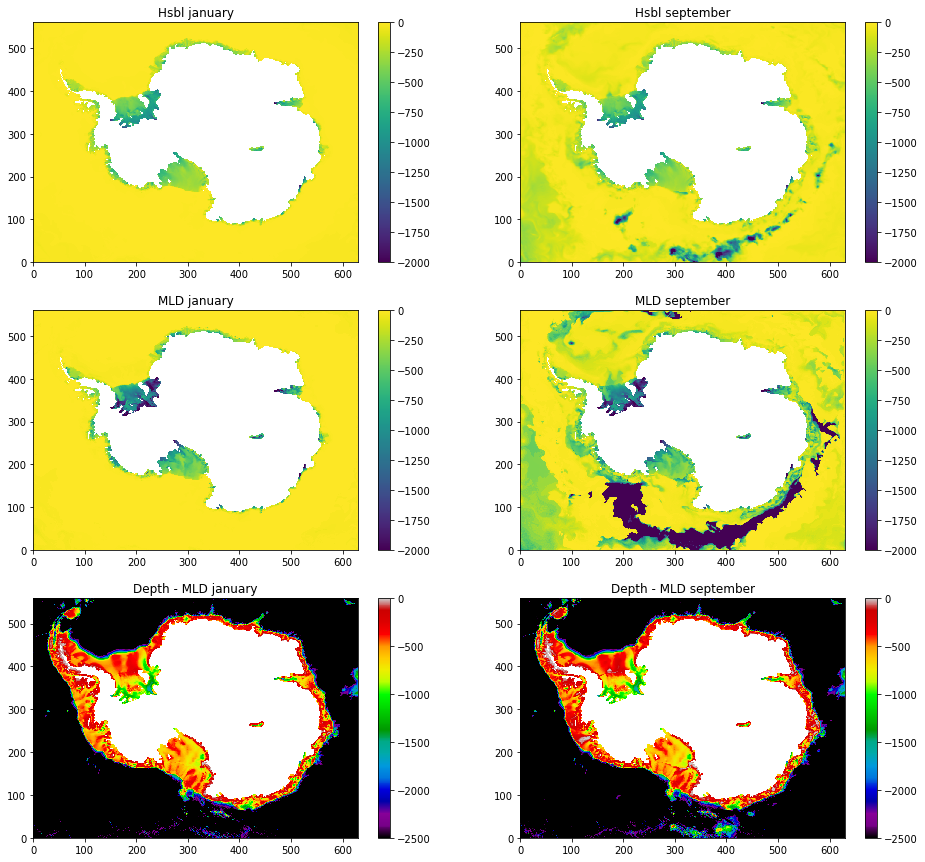

In [34]:
# compare Hsbl from model wth MLD calculated by density grad. criteria (0.03 kg m-3)

depth_bottom = z_rho[:,:,:,0]
    

fig = plt.figure(figsize=(16,15))
ax1 = fig.add_subplot(321)
cy=plt.pcolor(Hsbl[0,:,:], vmin=-2000, vmax=-0)
plt.colorbar(cy)
plt.title('Hsbl january')

ax2 = fig.add_subplot(322)
cy=plt.pcolor(Hsbl[8,:,:], vmin=-2000, vmax=-0)
plt.colorbar(cy)
plt.title('Hsbl september')

ax3 = fig.add_subplot(323)
cz=plt.pcolor(np.squeeze(MLD[0,:,:]), vmin=-2000, vmax=-0)
plt.colorbar(cz)
plt.title('MLD january')

ax4 = fig.add_subplot(324)
cw=plt.pcolor(np.squeeze(MLD[8,:,:]), vmin=-2000, vmax=-0)
plt.colorbar(cw)
plt.title('MLD september')

ax1 = fig.add_subplot(325)
cy=plt.pcolor(depth_bottom[0,:,:]-Hsbl[0,:,:], vmin=-2500, vmax=0, cmap=plt.get_cmap('nipy_spectral'))
plt.colorbar(cy)
plt.title('Depth - MLD january')

ax2 = fig.add_subplot(326)
cy=plt.pcolor(depth_bottom[8,:,:]-Hsbl[8,:,:], vmin=-2500, vmax=0, cmap=plt.get_cmap('nipy_spectral'))
plt.colorbar(cy)
plt.title('Depth - MLD september')


fig_path = '/users/boeiradi/COLD_project/postprocessing/figs/MLD/'
name_fig='waom10extend_shflim_S_0.25Q_MLD_yr21.png'
plt.savefig(fig_path + name_fig, dpi=300)

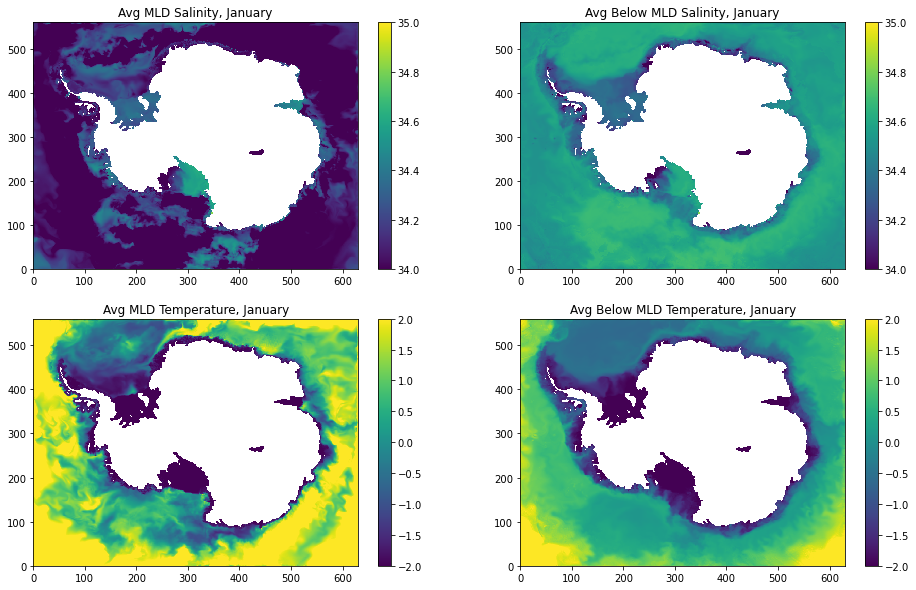

In [29]:
# check summer values of salinity avg for MLD x below MLD

fig = plt.figure(figsize=(16,10))
ax1 = fig.add_subplot(221)
plt.title('Avg MLD Salinity, January')
cy=plt.pcolor(salt_mld[0,:,:])
plt.colorbar(cy)
plt.clim(34,35)
ax2 = fig.add_subplot(223)
plt.title('Avg MLD Temperature, January')
cy=plt.pcolor(temp_mld[0,:,:])
plt.colorbar(cy)
plt.clim(-2,2)
ax3 = fig.add_subplot(222)
plt.title('Avg Below MLD Salinity, January')
cy=plt.pcolor(salt_deep[0,:,:])
plt.colorbar(cy)
plt.clim(34,35)
ax4 = fig.add_subplot(224)
plt.title('Avg Below MLD Temperature, January')
cy=plt.pcolor(temp_deep[0,:,:])
plt.colorbar(cy)
plt.clim(-2,2)

name_fig='waom10extend_shflim_S_0.25Q_MLD_TS_Jan_yr21.png'
plt.savefig(fig_path + name_fig, dpi=300)
plt.show()

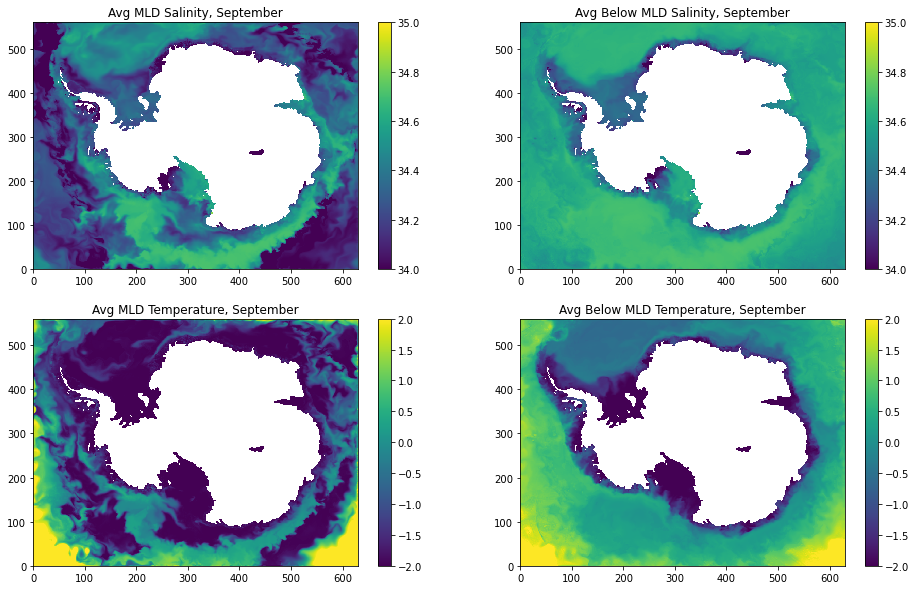

In [13]:
# check winter values of salinity avg for MLD x below MLD

fig = plt.figure(figsize=(16,10))
ax1 = fig.add_subplot(221)
plt.title('Avg MLD Salinity, September')
cy=plt.pcolor(salt_mld[8,:,:])
plt.colorbar(cy)
plt.clim(34,35)
ax2 = fig.add_subplot(223)
plt.title('Avg MLD Temperature, September')
cy=plt.pcolor(temp_mld[8,:,:])
plt.colorbar(cy)
plt.clim(-2,2)
ax3 = fig.add_subplot(222)
plt.title('Avg Below MLD Salinity, September')
cy=plt.pcolor(salt_deep[8,:,:])
plt.colorbar(cy)
plt.clim(34,35)
ax4 = fig.add_subplot(224)
plt.title('Avg Below MLD Temperature, September')
cy=plt.pcolor(temp_deep[8,:,:])
plt.colorbar(cy)
plt.clim(-2,2)

name_fig='waom10extend_shflim_S_0.25Q_MLD_TS_Sep_yr21.png'
plt.savefig(fig_path + name_fig, dpi=300)
plt.show()

In [11]:
# Calculation of the slope of the MLD/Hsbl: 
#
# for a cross section (either meridional or zonal), the tan(theta) = dz/dx (or dz/dy)
#   where theta is the slope in degrees, dx and dz are the distance b/w gridpoints and dz is the difference
#   in height of the MLD

# 1. testing doing for dx and dy separated:
pm = np.array(ds.pm)
pn = np.array(ds.pn)

dx = np.divide(1,pm)
dy = np.divide(1,pn)


# testing numpy gradient
dx_mld = np.gradient(Hsbl,axis=1)
dy_mld = np.gradient(Hsbl,axis=2)


print(dx.shape,dy.shape,Hsbl.shape,dx_mld.shape, dy_mld.shape)

(560, 630) (560, 630) (12, 560, 630) (12, 560, 630) (12, 560, 630)


In [13]:
## read diffusion/advection of temperature - horizontal and vertical terms:

for mm  in ['01','02','03','04','05','06','07','08','09','10','11','12']:
    dd = xr.open_dataset('/scratch/project_2000789/boeiradi/waom10extend_shflim_S_0.25Q/output_21yr/ocean_dia_00' + mm + '.nc')
    print(dd.variables["temp_vdiff"].shape)
    temp_hdiff_tmp = np.nanmean(dd.variables["temp_hdiff"], axis=0)
    temp_vdiff_tmp = np.nanmean(dd.variables["temp_vdiff"], axis=0)
    temp_hadv_tmp = np.nanmean(dd.variables["temp_hadv"], axis=0)
    temp_vadv_tmp = np.nanmean(dd.variables["temp_vadv"], axis=0)
    
     # concatenate monthly avgs into a yearly variable
    if mm == '01':
        temp_hdiff = temp_hdiff_tmp
        temp_vdiff = temp_vdiff_tmp
        temp_hadv = temp_hadv_tmp
        temp_vadv = temp_vadv_tmp
    elif mm == '02':
        temp_hdiff = np.stack((temp_hdiff,temp_hdiff_tmp), axis=0)
        temp_vdiff = np.stack((temp_vdiff,temp_vdiff_tmp), axis=0)
        temp_hadv = np.stack((temp_hadv,temp_hadv_tmp), axis=0)
        temp_vadv = np.stack((temp_vadv,temp_vadv_tmp), axis=0)
    else:
        temp_hdiff_tmp_4thdim = np.expand_dims(temp_hdiff_tmp, axis=0)
        temp_hdiff = np.concatenate((temp_hdiff,temp_hdiff_tmp_4thdim), axis=0)
        temp_vdiff_tmp_4thdim = np.expand_dims(temp_vdiff_tmp, axis=0)
        temp_vdiff = np.concatenate((temp_vdiff,temp_vdiff_tmp_4thdim), axis=0) 
        temp_hadv_tmp_4thdim = np.expand_dims(temp_hadv_tmp, axis=0)
        temp_hadv= np.concatenate((temp_hadv,temp_hadv_tmp_4thdim), axis=0)
        temp_vadv_tmp_4thdim = np.expand_dims(temp_vadv_tmp, axis=0)
        temp_vadv = np.concatenate((temp_vadv,temp_vadv_tmp_4thdim), axis=0) 
        
    dd.close()

(7, 31, 560, 630)
(6, 31, 560, 630)
(6, 31, 560, 630)
(6, 31, 560, 630)
(6, 31, 560, 630)
(6, 31, 560, 630)
(6, 31, 560, 630)
(6, 31, 560, 630)
(6, 31, 560, 630)
(6, 31, 560, 630)
(6, 31, 560, 630)
(6, 31, 560, 630)


In [14]:
## read diffusion/advection of temperature - horizontal and vertical terms:

for mm  in ['01','02','03','04','05','06','07','08','09','10','11','12']:
    dd = xr.open_dataset('/scratch/project_2000789/boeiradi/waom10extend_shflim_S_0.25Q/output_21yr/ocean_dia_00' + mm + '.nc')
    print(dd.variables["salt_vdiff"].shape)
    salt_hdiff_tmp = np.nanmean(dd.variables["salt_hdiff"], axis=0)
    salt_vdiff_tmp = np.nanmean(dd.variables["salt_vdiff"], axis=0)
    salt_hadv_tmp = np.nanmean(dd.variables["salt_hadv"], axis=0)
    salt_vadv_tmp = np.nanmean(dd.variables["salt_vadv"], axis=0)
    
     # concatenate monthly avgs into a yearly variable
    if mm == '01':
        salt_hdiff = salt_hdiff_tmp
        salt_vdiff = salt_vdiff_tmp
        salt_hadv = salt_hadv_tmp
        salt_vadv = salt_vadv_tmp
    elif mm == '02':
        salt_hdiff = np.stack((salt_hdiff,salt_hdiff_tmp), axis=0)
        salt_vdiff = np.stack((salt_vdiff,salt_vdiff_tmp), axis=0)
        salt_hadv = np.stack((salt_hadv,salt_hadv_tmp), axis=0)
        salt_vadv = np.stack((salt_vadv,salt_vadv_tmp), axis=0)
    else:
        salt_hdiff_tmp_4thdim = np.expand_dims(salt_hdiff_tmp, axis=0)
        salt_hdiff = np.concatenate((salt_hdiff,salt_hdiff_tmp_4thdim), axis=0)
        salt_vdiff_tmp_4thdim = np.expand_dims(salt_vdiff_tmp, axis=0)
        salt_vdiff = np.concatenate((salt_vdiff,salt_vdiff_tmp_4thdim), axis=0) 
        salt_hadv_tmp_4thdim = np.expand_dims(salt_hadv_tmp, axis=0)
        salt_hadv= np.concatenate((salt_hadv,salt_hadv_tmp_4thdim), axis=0)
        salt_vadv_tmp_4thdim = np.expand_dims(salt_vadv_tmp, axis=0)
        salt_vadv = np.concatenate((salt_vadv,salt_vadv_tmp_4thdim), axis=0) 
        
    dd.close()

(7, 31, 560, 630)
(6, 31, 560, 630)
(6, 31, 560, 630)
(6, 31, 560, 630)
(6, 31, 560, 630)
(6, 31, 560, 630)
(6, 31, 560, 630)
(6, 31, 560, 630)
(6, 31, 560, 630)
(6, 31, 560, 630)
(6, 31, 560, 630)
(6, 31, 560, 630)


In [15]:
## read tendency terms for temperature and salinity:

for mm  in ['01','02','03','04','05','06','07','08','09','10','11','12']:
    dd = xr.open_dataset('/scratch/project_2000789/boeiradi/waom10extend_shflim_S_0.25Q/output_21yr/ocean_dia_00' + mm + '.nc')
    salt_rate_tmp = np.nanmean(dd.variables["salt_rate"], axis=0)
    temp_rate_tmp = np.nanmean(dd.variables["temp_rate"], axis=0)
    
    # concatanate monthly avgs into a yearly variable
    if mm == '01':
        salt_rate = salt_rate_tmp
        temp_rate = temp_rate_tmp
    elif mm == '02':
        salt_rate = np.stack((salt_rate,salt_rate_tmp), axis=0)
        temp_rate = np.stack((temp_rate,temp_rate_tmp), axis=0)
    else:
        salt_rate_tmp_4thdim = np.expand_dims(salt_rate_tmp, axis=0)
        salt_rate = np.concatenate((salt_rate,salt_rate_tmp_4thdim), axis=0)
        temp_rate_tmp_4thdim = np.expand_dims(temp_rate_tmp, axis=0)
        temp_rate = np.concatenate((temp_rate,temp_rate_tmp_4thdim), axis=0)
        
    dd.close()

In [16]:
# calculate model thickness for vertical integrals:
# use z_w_avg (monthly)

# calculate dz following:
dz = np.empty((12,560,630,31))
dz_inv = np.empty((12,560,630,31))


for tt in np.arange(0,12):
    z_w_sorted = -1*z_w[tt,:,:,::-1]
    print(z_w_sorted.shape)
    dz_inv[tt,:,:,:] = np.diff(z_w_sorted,axis=2)
    dz[tt,:,:,:] = dz_inv[tt,:,:,::-1]

(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)


In [17]:
print(dz.shape, temp_hdiff.shape)

# transpose dz to the same dim order as temp_xdiff
dz_trsp = dz.transpose(0,3,1,2)

print(dz_trsp.shape)

(12, 560, 630, 31) (12, 31, 560, 630)
(12, 31, 560, 630)


In [18]:
mld_k = np.empty(salt[:,0,:,:].shape)

temp_hdiff_mld_vint = np.empty(salt[:,0,:,:].shape)
temp_vdiff_mld_vint = np.empty(salt[:,0,:,:].shape)
salt_hdiff_mld_vint = np.empty(salt[:,0,:,:].shape)
salt_vdiff_mld_vint = np.empty(salt[:,0,:,:].shape)

temp_hadv_mld_vint = np.empty(salt[:,0,:,:].shape)
temp_vadv_mld_vint = np.empty(salt[:,0,:,:].shape)
salt_hadv_mld_vint = np.empty(salt[:,0,:,:].shape)
salt_vadv_mld_vint = np.empty(salt[:,0,:,:].shape)

temp_rate_mld_vint = np.empty(salt[:,0,:,:].shape)
salt_rate_mld_vint = np.empty(salt[:,0,:,:].shape)

for mm in np.arange(0,12):
    depth = np.squeeze(z_rho[mm,:,:,:])
    depth_sort = depth.transpose(2,0,1) #'s_rho','eta_rho','xi_rho')
    print(mm)
    
    for ii in np.arange(0,560):
        for jj in np.arange(0,630):
            
            ind_tmp = np.array(np.where(-depth_sort[:,ii,jj] > -np.squeeze(Hsbl[mm,ii,jj])))
            #print(ind_tmp)
            
            if ind_tmp.size != 0:
                #print('ind_tmp nonzero')
                kk = np.max(ind_tmp)    
                #print(kk)
                mld_k[mm,ii,jj]=kk
                
                # for vertically-integrated vars: calculate var*dz_trsp
            # Diffusion
                temp_hdiff_mld_dz_trsp = temp_hdiff[mm,kk:,ii,jj]*dz_trsp[mm,kk:,ii,jj]
                temp_vdiff_mld_dz_trsp = temp_vdiff[mm,kk:,ii,jj]*dz_trsp[mm,kk:,ii,jj]
                salt_hdiff_mld_dz_trsp = salt_hdiff[mm,kk:,ii,jj]*dz_trsp[mm,kk:,ii,jj]
                salt_vdiff_mld_dz_trsp = salt_vdiff[mm,kk:,ii,jj]*dz_trsp[mm,kk:,ii,jj]
                #print(temp_hdiff_mld_dz_trsp.shape)
                # sum in the vertical
                temp_hdiff_mld_vint[mm,ii,jj] = np.nansum(temp_hdiff_mld_dz_trsp, axis=0)
                temp_vdiff_mld_vint[mm,ii,jj] = np.nansum(temp_vdiff_mld_dz_trsp, axis=0)
                salt_hdiff_mld_vint[mm,ii,jj] = np.nansum(salt_hdiff_mld_dz_trsp, axis=0)
                salt_vdiff_mld_vint[mm,ii,jj] = np.nansum(salt_vdiff_mld_dz_trsp, axis=0)
                del temp_hdiff_mld_dz_trsp, temp_vdiff_mld_dz_trsp
                del salt_hdiff_mld_dz_trsp, salt_vdiff_mld_dz_trsp

            # Advection
                temp_hadv_mld_dz_trsp = temp_hadv[mm,kk:,ii,jj]*dz_trsp[mm,kk:,ii,jj]
                temp_vadv_mld_dz_trsp = temp_vadv[mm,kk:,ii,jj]*dz_trsp[mm,kk:,ii,jj]
                salt_hadv_mld_dz_trsp = salt_hadv[mm,kk:,ii,jj]*dz_trsp[mm,kk:,ii,jj]
                salt_vadv_mld_dz_trsp = salt_vadv[mm,kk:,ii,jj]*dz_trsp[mm,kk:,ii,jj]
                # sum in the vertical
                temp_hadv_mld_vint[mm,ii,jj] = np.nansum(temp_hadv_mld_dz_trsp, axis=0)
                temp_vadv_mld_vint[mm,ii,jj] = np.nansum(temp_vadv_mld_dz_trsp, axis=0)
                salt_hadv_mld_vint[mm,ii,jj] = np.nansum(salt_hadv_mld_dz_trsp, axis=0)
                salt_vadv_mld_vint[mm,ii,jj] = np.nansum(salt_vadv_mld_dz_trsp, axis=0)
                del temp_hadv_mld_dz_trsp, temp_vadv_mld_dz_trsp
                del salt_hadv_mld_dz_trsp, salt_vadv_mld_dz_trsp
                
            # Tendency
                temp_rate_mld_dz_trsp = temp_rate[mm,kk:,ii,jj]*dz_trsp[mm,kk:,ii,jj]
                salt_rate_mld_dz_trsp = salt_rate[mm,kk:,ii,jj]*dz_trsp[mm,kk:,ii,jj]
                # sum in the vertical
                temp_rate_mld_vint[mm,ii,jj] = np.nansum(temp_rate_mld_dz_trsp, axis=0)
                salt_rate_mld_vint[mm,ii,jj] = np.nansum(salt_rate_mld_dz_trsp, axis=0)
                del temp_rate_mld_dz_trsp, salt_rate_mld_dz_trsp
                
            del ind_tmp

         

0
1
2
3
4
5
6
7
8
9
10
11


(12, 560, 630)


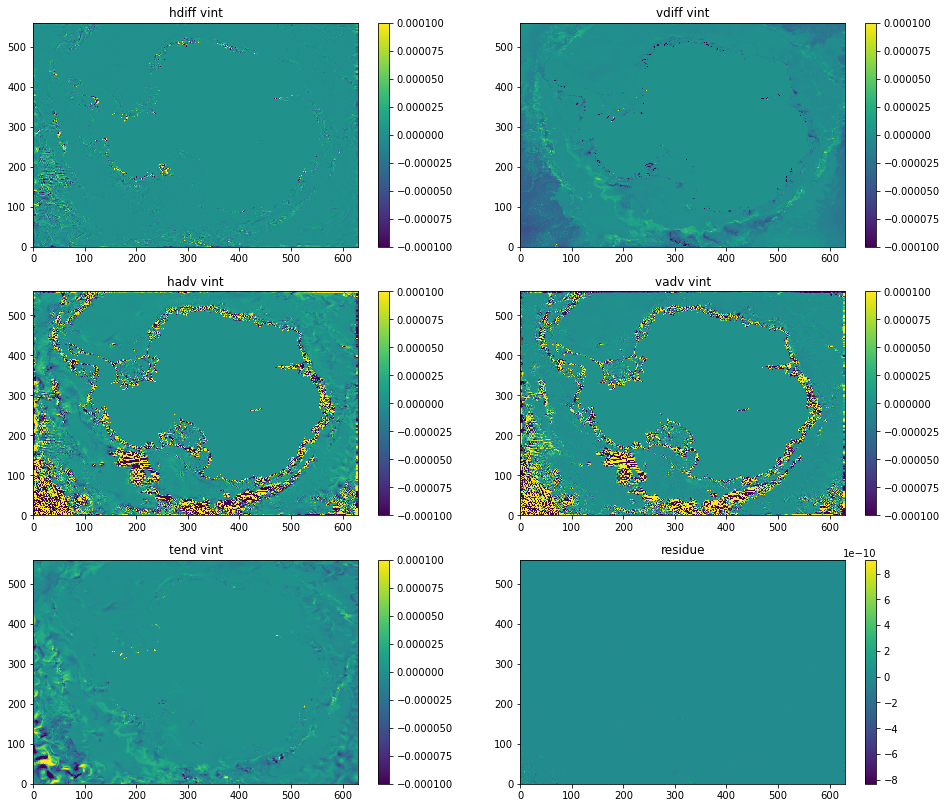

In [22]:
print(temp_hdiff_mld_vint.shape)

mm=8

fig = plt.figure(figsize=(16,14))
ax1 = fig.add_subplot(321)
plt.title('hdiff vint')
cy=plt.pcolor(temp_hdiff_mld_vint[mm,:,:])
plt.colorbar(cy)
plt.clim(-.0001,.0001)
ax2 = fig.add_subplot(322)
plt.title('vdiff vint')
cy=plt.pcolor(temp_vdiff_mld_vint[mm,:,:])
plt.colorbar(cy)
plt.clim(-.0001,.0001)
ax3 = fig.add_subplot(323)
plt.title('hadv vint')
cy=plt.pcolor(temp_hadv_mld_vint[mm,:,:])
plt.colorbar(cy)
plt.clim(-.0001,.0001)
ax4 = fig.add_subplot(324)
plt.title('vadv vint')
cy=plt.pcolor(temp_vadv_mld_vint[mm,:,:])
plt.colorbar(cy)
plt.clim(-.0001,.0001)
ax5 = fig.add_subplot(325)
plt.title('tend vint')
cy=plt.pcolor(temp_rate_mld_vint[mm,:,:])
plt.colorbar(cy)
plt.clim(-.0001,.0001)
ax6 = fig.add_subplot(326)
rhs = temp_hdiff_mld_vint[mm,:,:]+temp_vdiff_mld_vint[mm,:,:]+temp_hadv_mld_vint[mm,:,:]+temp_vadv_mld_vint[mm,:,:]
plt.title('residue')
cy=plt.pcolor(temp_rate_mld_vint[mm,:,:]-rhs)
plt.colorbar(cy)
#plt.clim(-.0001,.0001)

name_fig='waom10extend_shflim_S_0.25Q_MLD_OHB_Sep_yr21.png'
plt.savefig(fig_path + name_fig, dpi=300)
plt.close()

In [23]:
# export netCDF file containing:
# - MLD (Hsbl)
# - temp and salt averaged over MLD [temp_MLD, salt_MLD] 
# - temp/salt diffusion components (xz and yz, across MLD)

fn = '/scratch/project_2000339/boeiradi/waom10extend_shflim_S_0.25Q/output_21yr/MLD_vint_vars_for_WMT.nc'
dx = Dataset(fn, 'w', format='NETCDF4')

times = dx.createDimension('times', 12)
xi_rho = dx.createDimension('xi_rho', 630,)
eta_rho = dx.createDimension('eta_rho', 560)

In [24]:
ocean_times = dx.createVariable('times', 'f4', ('times',))
ocean_times.units = 'seconds of the year'
xi = dx.createVariable('xi_rho', 'f4', ('xi_rho',))
eta = dx.createVariable('eta_rho', 'f4', ('eta_rho',))
sfc_mld = dx.createVariable('sfc_mld', 'f4', ('times', 'eta_rho', 'xi_rho',))
sfc_mld.units = 'Surface boundary layer depth (meters)'
temp_avg_mld = dx.createVariable('temp_avg_mld', 'f4', ('times', 'eta_rho', 'xi_rho',))
temp_avg_mld.units = 'Averaged temperature in the MLD (deg Celsius)'
salt_avg_mld = dx.createVariable('salt_avg_mld', 'f4', ('times', 'eta_rho', 'xi_rho',))
salt_avg_mld.units = 'Averaged salinity in the MLD (pss)'

# vertically integrated terms
# diffusion terms
temp_vdia_diff_mld_vint = dx.createVariable('temp_vdia_diff_mld_vint', 'f4', ('times', 'eta_rho', 'xi_rho',))
salt_vdia_diff_mld_vint = dx.createVariable('salt_vdia_diff_mld_vint', 'f4', ('times', 'eta_rho', 'xi_rho',))
temp_vdia_diff_mld_vint.units = 'vertical MLD component  of temp_diff depth-integrated throughout the MLD (degC s-1)'
salt_vdia_diff_mld_vint.units = 'vertical MLD component  of salt_diff depth-integrated throughout the MLD (s-1)'
temp_hdia_diff_mld_vint = dx.createVariable('temp_hdia_diff_mld_vint', 'f4', ('times', 'eta_rho', 'xi_rho',))
salt_hdia_diff_mld_vint = dx.createVariable('salt_hdia_diff_mld_vint', 'f4', ('times', 'eta_rho', 'xi_rho',))
temp_hdia_diff_mld_vint.units = 'horizontal MLD component of temp_diff depth-integrated throughout the MLD (degC s-1)'
salt_hdia_diff_mld_vint.units = 'horizontal MLD component of salt_diff depth-integrated throughout the MLD (s-1)'
# advective terms
temp_vdia_adv_mld_vint = dx.createVariable('temp_vdia_adv_mld_vint', 'f4', ('times', 'eta_rho', 'xi_rho',))
salt_vdia_adv_mld_vint = dx.createVariable('salt_vdia_adv_mld_vint', 'f4', ('times', 'eta_rho', 'xi_rho',))
temp_vdia_adv_mld_vint.units = 'vertical MLD component  of temp_adv to the base of the MLD (degC s-1)'
salt_vdia_adv_mld_vint.units = 'vertical MLD component  of salt_adv to the base of the MLD (s-1)'
temp_hdia_adv_mld_vint = dx.createVariable('temp_hdia_adv_mld_vint', 'f4', ('times', 'eta_rho', 'xi_rho',))
salt_hdia_adv_mld_vint = dx.createVariable('salt_hdia_adv_mld_vint', 'f4', ('times', 'eta_rho', 'xi_rho',))
temp_hdia_adv_mld_vint.units = 'horizontal MLD component of temp_adv to the base of the MLD (degC s-1)'
salt_hdia_adv_mld_vint.units = 'horizontal MLD component of salt_adv to the base of the MLD (s-1)'
# tendency terms
temp_tend_mld_vint = dx.createVariable('temp_tend_avg_mld_vint', 'f4', ('times', 'eta_rho', 'xi_rho',))
salt_tend_mld_vint = dx.createVariable('salt_tend_avg_mld_vint', 'f4', ('times', 'eta_rho', 'xi_rho',))
temp_tend_mld_vint.units = 'temp_rate depth-integrated throughout the MLD (degC s-1)'
salt_tend_mld_vint.units = 'salt_rate depth-integrated throughout the MLD (s-1)'


In [25]:
ocean_times[:] = np.arange(1314000,31536000,2628000) # monthly 
xi[:] = np.arange(0,630)
eta[:] = np.arange(0,560)
sfc_mld[:,:,:] = Hsbl
temp_avg_mld[:,:,:] = temp_mld
salt_avg_mld[:,:,:] = salt_mld

temp_vdia_diff_mld_vint[:,:,:] = temp_vdiff_mld_vint
salt_vdia_diff_mld_vint[:,:,:] = salt_vdiff_mld_vint
temp_hdia_diff_mld_vint[:,:,:] = temp_hdiff_mld_vint
salt_hdia_diff_mld_vint[:,:,:] = salt_hdiff_mld_vint

temp_vdia_adv_mld_vint[:,:,:] = temp_vadv_mld_vint
salt_vdia_adv_mld_vint[:,:,:] = salt_vadv_mld_vint
temp_hdia_adv_mld_vint[:,:,:] = temp_hadv_mld_vint
salt_hdia_adv_mld_vint[:,:,:] = salt_hadv_mld_vint

temp_tend_mld_vint[:,:,:] = temp_rate_mld_vint
salt_tend_mld_vint[:,:,:] = salt_rate_mld_vint

dx.close()